## 2011 Census

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
df1 = pd.read_csv('/Users/sid/Desktop/shrug_id.csv')
df2 = pd.read_csv('/Users/sid/Desktop/LGD_villages.csv')
census = pd.read_csv('/Users/sid/Downloads/shrug-vd11-csv/pc11_vd_clean_shrid.csv')
ntl12 = pd.read_csv('/Users/sid/Desktop/2012.csv',low_memory=False)
ma2 = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/concatenated_data.csv',low_memory=False)

## Load Gini

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial
pd.set_option('display.max_columns', None)

df12 = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/gini2012.csv')
df17 = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/gini2017.csv')
df20 = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/gini2020.csv')

df12b = df12.rename(columns={
                        'subdist_ntl': 'subdist_ntl12', 'subdist_population':'subdist_population12',
                        'subdist_ntl_pc':'subdist_ntl_pc12','ntl_pc_mean':'ntl_pc_mean12',
                        'sum_y':'sum_y12','numerator':'numerator12','num':'num12','alesina':'alesina12'
                                    })

df17b = df17.rename(columns={
                        'subdist_ntl': 'subdist_ntl17', 'subdist_population':'subdist_population17',
                        'subdist_ntl_pc':'subdist_ntl_pc17','ntl_pc_mean':'ntl_pc_mean17',
                        'sum_y':'sum_y17','numerator':'numerator17','num':'num17','alesina':'alesina17'
                                    })

df20b = df20.rename(columns={
                        'subdist_ntl': 'subdist_ntl20', 'subdist_population':'subdist_population20',
                        'subdist_ntl_pc':'subdist_ntl_pc20','ntl_pc_mean':'ntl_pc_mean20',
                        'sum_y':'sum_y20','numerator':'numerator20','num':'num20','alesina':'alesina20'
                                    })


print(len(df12b))
print(len(df17b))
print(len(df20b))

4134
5251
5796


In [3]:
mer1 = pd.merge(df20b,df17b,on=['Subdistrict','District','State'],how='outer')
print(len(mer1))
mer2 = pd.merge(mer1,df12b,on=['Subdistrict','District','State'],how='outer')
print(len(mer2))

df12['year'] = 2012
df17['year'] = 2017
df20['year'] = 2020

con2 = pd.concat([df12,df17, df20], ignore_index=True)
con2



5950
5950


,State,District,District_code,Subdistrict,subdist_ntl,subdist_population,subdist_ntl_pc,ntl_pc_mean,sum_y,numerator,num,alesina,year,District code
0,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632.0,Diglipur,301.597143,39093.0,0.007715,0.008681,0.269118,3.107570,31.0,0.287276,2012,NaN
1,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632.0,Mayabunder,99.794714,24027.0,0.004153,0.004049,0.125517,1.362299,31.0,0.332030,2012,NaN
2,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632.0,Rangat,623.444120,33850.0,0.018418,0.015203,0.714552,5.035267,47.0,0.721415,2012,NaN
3,ANDAMAN AND NICOBAR ISLANDS,SOUTH ANDAMANS,602.0,Ferrargunj,355.905708,38549.0,0.009233,0.010834,0.400850,4.970367,37.0,0.356781,2012,NaN
4,ANDAMAN AND NICOBAR ISLANDS,SOUTH ANDAMANS,602.0,Little Andaman,606.951417,19625.0,0.030927,0.066319,0.530552,0.915425,8.0,0.693645,2012,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15176,WEST BENGAL,PURULIA,321.0,Purulia - I,2071.590016,170159.0,0.012174,0.018120,1.920768,59.511847,106.0,0.424842,2020,NaN
15177,WEST BENGAL,PURULIA,321.0,Purulia - II,3411.527643,191682.0,0.017798,0.711575,78.273300,330.393866,110.0,0.932345,2020,NaN
15178,WEST BENGAL,PURULIA,321.0,Raghunathpur - I,1848.506665,133690.0,0.013827,0.024742,2.004137,41.693556,81.0,0.498673,2020,NaN
15179,WEST BENGAL,PURULIA,321.0,Raghunathpur - II,4210.036717,128783.0,0.032691,1.358357,141.269096,796.246943,104.0,0.901223,2020,NaN


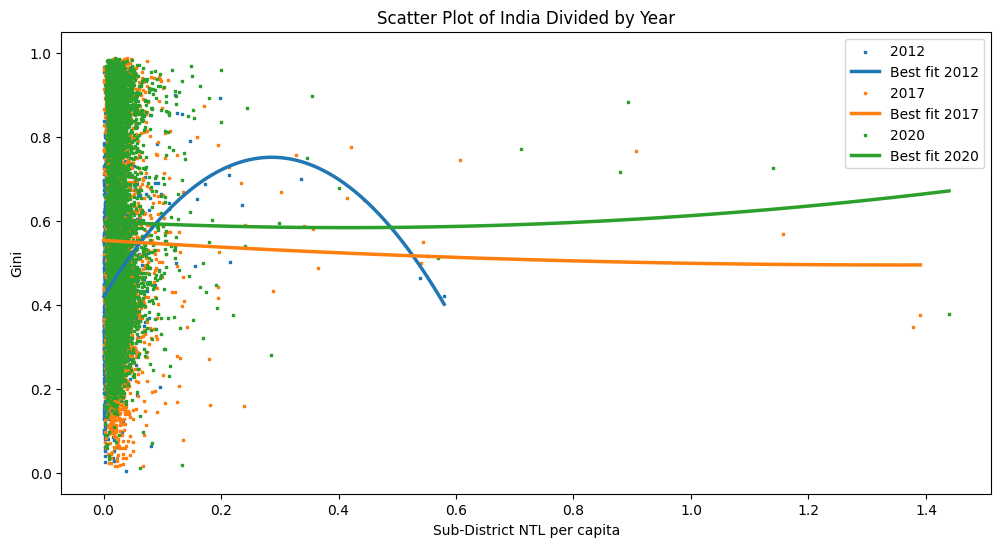

In [4]:
plt.figure(figsize=(12, 6))

con4 = con2.copy()
con4 = con4[con4['alesina'] > 0]
con4 = con4[con4['subdist_ntl_pc'] <= 1.5]

# Get the list of unique years
years = con4['year'].unique()

# Loop through each year and plot
for year in years:
    year_df = con4[con4['year'] == year]
    
    if not year_df.empty:
        plt.scatter(year_df['subdist_ntl_pc'], year_df['alesina'], label=f'{year}',marker=',', s=0.75) #, color=dot_colors[year] 
        
        # Fit a polynomial best fit line (e.g., a quadratic curve)
        coefficients = np.polyfit(year_df['subdist_ntl_pc'], year_df['alesina'], 2)
        polynomial = np.poly1d(coefficients)
        x_range = np.linspace(min(year_df['subdist_ntl_pc']), max(year_df['subdist_ntl_pc']), 100)
        y_fit = polynomial(x_range)
        
        # Plot the polynomial best fit line
        plt.plot(x_range, y_fit, label=f'Best fit {year}',linewidth=2.5)

# Add labels and title
plt.xlabel("Sub-District NTL per capita")
plt.ylabel("Gini")
plt.title("Scatter Plot of India Divided by Year")
plt.ylim(-0.05, 1.05)

# Add a legend
plt.legend()

# Display the plot
plt.show()

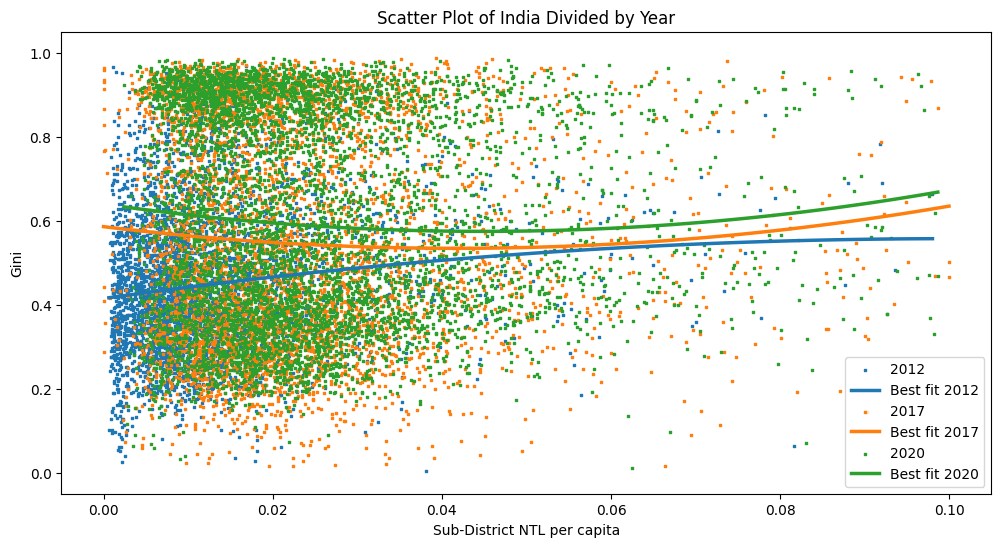

In [5]:
plt.figure(figsize=(12, 6))

con3 = con2.copy()
con3 = con3[con3['alesina'] > 0]
con3 = con3[con3['subdist_ntl_pc'] <= 0.1]

years = con3['year'].unique()

# Define colors for each year
# dot_colors = {
#     2012: 'blue',
#     2017: 'orange',
#     2020: 'green',  
# }
# line_colors = {
#     2012: 'blue',
#     2017: 'orange',
#     2020: 'green',  
# }

# Loop through each year and plot
for year in years:
    year_df = con3[con3['year'] == year]
    
    if not year_df.empty:
        plt.scatter(year_df['subdist_ntl_pc'], year_df['alesina'], label=f'{year}',marker=',', s=0.75) #, color=dot_colors[year] 
        
        # Fit a polynomial best fit line (e.g., a quadratic curve)
        coefficients = np.polyfit(year_df['subdist_ntl_pc'], year_df['alesina'], 2)
        polynomial = np.poly1d(coefficients)
        x_range = np.linspace(min(year_df['subdist_ntl_pc']), max(year_df['subdist_ntl_pc']), 100)
        y_fit = polynomial(x_range)
        
        # Plot the polynomial best fit line
        plt.plot(x_range, y_fit, label=f'Best fit {year}',linewidth=2.5)#,color=line_colors[year])

# Add labels and title
plt.xlabel("Sub-District NTL per capita")
plt.ylabel("Gini")
plt.title("Scatter Plot of India Divided by Year")
plt.ylim(-0.05, 1.05)

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:

con = con2.copy()
con = con[con['alesina'] > 0]
con = con[con['subdist_ntl_pc'] <= 0.1]

# Get the list of unique states and years
states = con['State'].unique()
years = con['year'].unique()

# Loop through each state and plot

for state in states:
    state_df = con[con['State'] == state]
    
    plt.figure(figsize=(12, 6))
    
    for year in years:
        year_df = state_df[state_df['year'] == year]
        
        if not year_df.empty:
            plt.scatter(year_df['subdist_ntl_pc'], year_df['alesina'], label=f'{year}', marker='.')
            
            # Fit a polynomial best fit line (e.g., a quadratic curve)
            coefficients = np.polyfit(year_df['subdist_ntl_pc'], year_df['alesina'], 2)
            polynomial = np.poly1d(coefficients)
            x_range = np.linspace(min(year_df['subdist_ntl_pc']), max(year_df['subdist_ntl_pc']), 100)
            y_fit = polynomial(x_range)
            
            # Plot the polynomial best fit line
            plt.plot(x_range, y_fit, label=f'Best fit {year}',linewidth=2.5)
    
    # Add labels and title
    plt.xlabel("Sub-District NTL per capita")
    plt.ylabel("Gini")
    plt.title(f"{state} - Scatter Plot by Year")
    plt.ylim(-0.05, 1.05)
    
    # Add a legend
    plt.legend()
    
    # Display the plot
    plt.show()
